# The SQD protocol based on single photons without requiring the measurement capability of classical party

In [83]:
import numpy as np
import random

import matplotlib.pyplot as plt
from qiskit import quantum_info as qi
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp
from qiskit.primitives import StatevectorSampler, PrimitiveJob,StatevectorEstimator
from qiskit.circuit.library import TwoLocal,EfficientSU2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram

from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit,transpile
from qiskit import quantum_info
from qiskit_aer import AerSimulator 

# Step 1: Quantum Alice prepares n single photons, each of which is randomly in one of the four states |0>, |1>, |+>, |-> and transmits them to bob

['XH', 'I', 'X', 'X', 'H', 'X', 'I', 'H', 'XH', 'I']


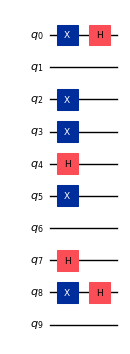

In [84]:
n=10
alice_choice=["I", "X", "H", "XH"]
choice_list=[]
qc=QuantumCircuit(n)
for i in range(0,n):
         choice=random.choices(alice_choice, k = 1)
         choice_list.extend(choice)
         if(choice[0]=="I"):
                 None
         elif(choice[0]=="X"):
                 qc.x(i)
         elif(choice[0]=="H"):
                 qc.h(i)
         else:
                 qc.x(i)
                 qc.h(i)                        
print(choice_list)
qc.draw("mpl",scale=0.5)

# Step-2:Bob preprares the following no-of photons

1. 2n message carrying photons -  For encoding his own secret messages, Bob prepares 2n single photons carrying messages in Z basis: if his secret 
classical bit is 0, he will prepare two adjacent single photons carrying messages in the same states; and if his secret classical bit is 
1, he will prepare two adjacent single photons carrying messages in the opposite states

2. 2n sample photons - decoy qubits used for randomization 

He combines both of 1 and 2 to create a string called "STR-1"

3. M (M>N) single photons for security and combines with n photons received from Alice.From this "STR-2" is formed. From "STR-2" random 2n qubits is selected randomly by bob and we name them as "STR-3" 

Let us create a circuit for creating STR-1 as mentioned above 

In [85]:

#Generating bob's secret message 
bin=[0,1] 
bob_msg=[]
for i in range(n):
    choice=random.choices(bin, k = 1)
    bob_msg.append(choice[0])
print("Bob secret message for alice which he is going to encode in the 2n message photons according to the encoding scheme :") 
print(bob_msg)   

#creating 2n random single photons used as decoy qubits in Z-basis
decoy_msg=[]
for i in range(2*n):
    choice=random.choices(bin, k = 1)
    decoy_msg.append(choice[0])
print("state of decoy photons created randomly:") 
print(decoy_msg)   


Bob secret message for alice which he is going to encode in the 2n message photons according to the encoding scheme :
[1, 0, 0, 1, 1, 1, 1, 0, 0, 0]
state of decoy photons created randomly:
[1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0]


Quantum circuit of STR-1


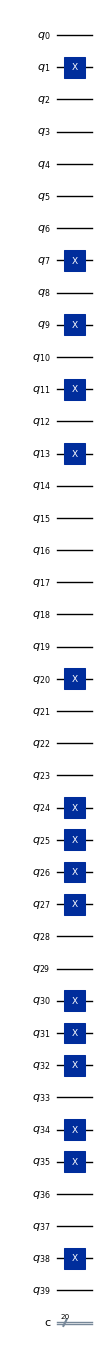

In [86]:
#Genreating circuit for STR-1
qc_str1=QuantumCircuit(4*n,2*n)
#message encoding
x=0
for i in range(0,2*n,2):
    if(bob_msg[x]==0):
        None
    else:
        qc_str1.x(i+1)  
    x=x+1     


#decoy qubits 
x=0
for i in range(2*n,4*n,1):
    if(decoy_msg[x]==0):
        None
    else:
        qc_str1.x(i)  
    x=x+1     

print("Quantum circuit of STR-1")
qc_str1.draw("mpl",scale=0.5)     

Let us create STR-2 as mentioned 

In [87]:
M=n+2 #Creating sequence of length  M (M>n) by bob 
M_msg=[]
for i in range(M):
    choice=random.choices(bin, k = 1)
    M_msg.append(choice[0])
print("state of M photons created randomly:") 
print(M_msg)

#n photons already created by alice and sent to bob
print("State of n photons sent by alice to bob:")
print(choice_list)

#Final STR-2 string which the comination of M and n photons sent by bob
print()
str_2=[]
str_2.extend(M_msg)
str_2.extend(choice_list)
print("STR-2: ",str_2)

state of M photons created randomly:
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State of n photons sent by alice to bob:
['XH', 'I', 'X', 'X', 'H', 'X', 'I', 'H', 'XH', 'I']

STR-2:  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 'XH', 'I', 'X', 'X', 'H', 'X', 'I', 'H', 'XH', 'I']


STR-3 is created by selecting 2n random bits from the str-2

In [88]:
str_3=[]
l=[]
chosen_qubits=[] #to store the index of the chosen qubit to form STR-3 FROM STR-2
for i in range(0,20):
    l.append(i)
for i in l:
  c=random.choices(l, k = 1)
  chosen_qubits.append(c[0])
  str_3.append(str_2[c[0]])
print("index of chosen qubits",chosen_qubits)
print("STR-3 :",str_3)

    

index of chosen qubits [18, 0, 13, 2, 12, 7, 4, 10, 19, 4, 6, 16, 1, 7, 2, 3, 9, 19, 4, 9]
STR-3 : ['I', 0, 'I', 1, 'XH', 0, 0, 0, 'H', 0, 0, 'H', 0, 0, 1, 0, 0, 'H', 0, 0]


Lets create the quantum circuit of STR-3

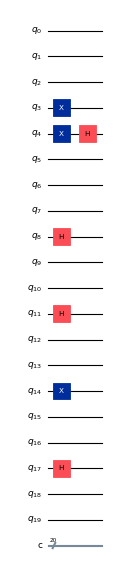

In [89]:
x=0
qc_str3=QuantumCircuit(2*n,2*n)
for i in range(2*n):
    if(str_3[i]==1 or str_3[i]=="X"):
        qc_str3.x(i)
    elif(str_3[i]=="H"):
        qc_str3.h(i)    
    elif(str_3[i]=="XH"):
        qc_str3.x(i)
        qc_str3.h(i) 
    else:
        None    

qc_str3.draw("mpl",scale=0.4)        

Now Quantum Circuit of STR-1 and STR-3 are mixed and randomized and  are sent to alice by bob,remember bob has encoded his message in STR-1

# STEP-3 
Alice measures the received photons of STR-3 randomly in the Z-BASIS or X-Basis

The basis alice chose to measure ['Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'X', 'X', 'Z', 'X', 'Z', 'Z', 'X', 'Z', 'Z', 'X', 'X', 'Z']


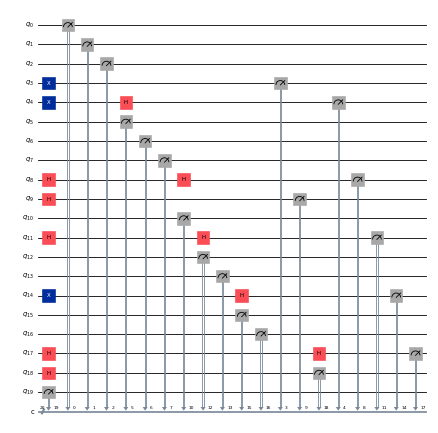

In [90]:
alice_meas_choice=[]
basis_choice=["X","Z"]
for i in range(len(str_3)):
    choice=random.choices(basis_choice, k = 1)
    alice_meas_choice.append(choice[0])
    if(choice[0]=="X"):
        qc_str3.h(i)
        qc_str3.measure(i,i) #measuring in X-BASIS
    else:
        qc_str3.measure(i,i) #measuring in Z-BASIS  
print("The basis alice chose to measure",alice_meas_choice)
qc_str3.draw("mpl",scale=0.3)  

In [91]:
simulator_aer=AerSimulator()

qc_aer=transpile(qc_str3,backend=simulator_aer) #transpiling the circuit based on the backend we choose
result=simulator_aer.run(qc_aer,shots=1).result() #runnung our circuit using the simulator

counts=result.get_counts()#getting counts of our measurement results
print(counts)
l=list(counts.keys())
c=l[0]
print("THE MEASUREMENT RESULT:",c)

{'01000100001000011000': 1}
THE MEASUREMENT RESULT: 01000100001000011000


# STEP-4

Bob publishes the positions of the photons which belong to STR-3.Remember STR-3 contains a subset of 
1. n photons (created by alice)  - lets call it CTRL single photons
2. M photons (created by bob) - lets call it SIFT single photons

In [92]:
CTRL_q=[]
SIFT_q=[]
for i in range(len(str_3)):
    if(str_3[i]==0 or str_3[i]==1):
       SIFT_q.append(i)
    else:
       CTRL_q.append(i)   
print("CTRL-Qubits \n",CTRL_q)
  
print("SIFT-Qubits \n",SIFT_q)

CTRL-Qubits 
 [0, 2, 4, 8, 11, 17]
SIFT-Qubits 
 [1, 3, 5, 6, 7, 9, 10, 12, 13, 14, 15, 16, 18, 19]


# STEP-5
# SECURITY CHECK BY ALICE ON THE CTRL QUBITS

The qubits  in STR-3 (the CTRL qubits) were prepared by him , so if the basis matches the result must be same, he can compare and see of there are any errors and if found that error rate is beyond certain limit ,communication is terminated

In [93]:
count=0
for i in CTRL_q:
    if((str_3[i]=="I" or str_3[i]=="X")  and alice_meas_choice[i]=="Z"):
        count=count+1
        print("Basis macthed in the following qubit:",i)
        if(str_3[i]=="I" and c[len(c)-1-i]=='0'):
            
            print("No EVE detected")
         
          
        elif(str_3[i]=="X" and c[len(c)-1-i]=='1'):
            
            print("No EVE detected")
        
        else:
            print(str_3[i],c[len(c)-1-i])
            
            print("EVE detected") 

    elif((str_3[i]=="H" or str_3[i]=="XH")  and alice_meas_choice[i]=="X"):
        count=count+1
        print("Basis matched in the following qubit:",i)
        if(str_3[i]=="H" and c[len(c)-1-i]=='0'):
            
            print("No EVE detected")
         
          
        elif(str_3[i]=="XH" and c[len(c)-1-i]=='1'):
            
            print("No EVE detected")
        
        else:
            print(str_3[i],c[len(c)-1-i])
            
            print("EVE detected---------------------------------------")         
            
              
    
if(count==0):
  print("Basis never matched (would not happen for large no of qubits)")        


Basis macthed in the following qubit: 0
No EVE detected
Basis macthed in the following qubit: 2
No EVE detected
Basis matched in the following qubit: 8
No EVE detected
Basis matched in the following qubit: 11
No EVE detected
Basis matched in the following qubit: 17
No EVE detected


# STEP-6
# SECURITY CHECK BY BOB ON THE SIFT QUBITS MEASURED IN Z-BASIS BY ALICE 

Since the SIFT qubits were prepared by bob when alice chose to measure them in the Z-basis and announce the results bob can check whether the measurement result matches or not

In [94]:
#FOR REFERENCE AND CHECK PLEASE IGNORE
print("index of chosen qubits",chosen_qubits)
print("STR-3 :",str_3)

index of chosen qubits [18, 0, 13, 2, 12, 7, 4, 10, 19, 4, 6, 16, 1, 7, 2, 3, 9, 19, 4, 9]
STR-3 : ['I', 0, 'I', 1, 'XH', 0, 0, 0, 'H', 0, 0, 'H', 0, 0, 1, 0, 0, 'H', 0, 0]


In [95]:
for i in range(len(str_3)):
        if(alice_meas_choice[i]=='Z'):  #checking only qubits measured by alice in Z-basis 
           if(str_3[i]==0 or str_3[i]==1): #checking only qubits beloging to M-msg in STR-3 (SIFT Qubits) not the n-photons which was checked in security check of alice
        
            index=chosen_qubits[i]
            print("check was done in the following qubit",i)
            print("index of the qubit in the original M-photon message",index)
            
            k=int(c[len(c)-1-i])
            if(k==(M_msg[index])): #comparing the initial message M created by bob with measurement result
                print('NO EVE DETECTED \n')
            else:
                print("EVE DETECTED----------------------------------- \n")    
        

check was done in the following qubit 1
index of the qubit in the original M-photon message 0
NO EVE DETECTED 

check was done in the following qubit 3
index of the qubit in the original M-photon message 2
NO EVE DETECTED 

check was done in the following qubit 5
index of the qubit in the original M-photon message 7
NO EVE DETECTED 

check was done in the following qubit 6
index of the qubit in the original M-photon message 4
NO EVE DETECTED 

check was done in the following qubit 7
index of the qubit in the original M-photon message 10
NO EVE DETECTED 

check was done in the following qubit 10
index of the qubit in the original M-photon message 6
NO EVE DETECTED 

check was done in the following qubit 12
index of the qubit in the original M-photon message 1
NO EVE DETECTED 

check was done in the following qubit 13
index of the qubit in the original M-photon message 7
NO EVE DETECTED 

check was done in the following qubit 15
index of the qubit in the original M-photon message 3
NO EV

# STEP-7 KEY EXCHANGE

Alice received both STR-1 and STR-3 from bob, STR-3 was used to security check above , STR-1 contains the message encoded in 2n-message-photons as well as 2n-sample-photons used as decoy

1. Alice discards the 2n sample photons (decoy) 
2. He measures the 2n message photons in the original order

According to the encoding rule of bob if two adjacent photons are same it is 0 and it is different it is 1.Lets measure the 2n-message photons and retrieve the message

In [96]:
#Recreating the circuit of str_1 as alice discards 2n qubits
qc_str1=QuantumCircuit(2*n,2*n)
#message encoding
x=0
for i in range(0,2*n,2):
    if(bob_msg[x]==0):
        None
    else:
        qc_str1.x(i+1)  
    x=x+1    
for i in range(2*n):
    qc_str1.measure(i,i)

In [97]:
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke

simulator_aer=AerSimulator()

qc_aer=transpile(qc_str1,backend=simulator_aer) #transpiling the circuit based on the backend we choose
result=simulator_aer.run(qc_aer,shots=1).result() #runnung our circuit using the simulator

counts=result.get_counts()#getting counts of our measurement results
print(counts)
l=list(counts.keys())
c=l[0]
print("THE MEASUREMENT RESULT:",c)

{'00000010101010000010': 1}
THE MEASUREMENT RESULT: 00000010101010000010


In [98]:
decoded_key=[]
for i in range(len(c)-1,-1,-2):
    if(c[i]==c[i-1]):
        decoded_key.append(0)
    else:
         decoded_key.append(1) 

print("The decoded key by Alice",decoded_key)
print("The original msg of bob gebereated before",bob_msg)
if(decoded_key==bob_msg):
    print("\nWE HAVE SUCCESSFULLY DECODED THE MESSAGE BOB SENT TO ALICE as the keys are matching")

The decoded key by Alice [1, 0, 0, 1, 1, 1, 1, 0, 0, 0]
The original msg of bob gebereated before [1, 0, 0, 1, 1, 1, 1, 0, 0, 0]

WE HAVE SUCCESSFULLY DECODED THE MESSAGE BOB SENT TO ALICE as the keys are matching


Alice implements the classical one-time pad encryption processes and publishes the 
ciphertexts to Bob according to the following rules: if the second photon of each two adjacent single photons carrying messages 
she measured is in the state of 0 and her secret classical bit is 0, she will publish 0 to Bob; and if the second photon of each two 
adjacent single photons carrying messages she measured is in the state of 0 and her secret classical bit is 1, she will publish 1 to 
Bob; and if the second photon of each two adjacent single photons carrying messages she measured is in the state of1 and her 
secret classical bit is 0, she will publish 1 to Bob; and if the second photon of each two adjacent single photons carrying messages 
she measured is in the state of1 and her secret classical bit is 1, she will publish 0 to Bob. According to the ciphertexts 
announced by Alice and the classical bits represented by all of the second photons from each two adjacent single photons carrying 
messages prepared by himself, Bob can directly decode out Alice’s secret messages. 